# This script performs data manipulation and analysis on a CSV file containing historical data of Bursa Malaysia (the stock exchange of Malaysia)

In [1]:
import pandas as pd
from tabulate import tabulate

# Global variable for the CSV file path
csv_file = '^KLSE.csv'

def manipulate_bursa_data():
    global csv_file
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)

    # Display the first few rows of the DataFrame using tabulate
    print("First few rows of the DataFrame:")
    print(tabulate(df.head(), headers='keys', tablefmt='fancy_grid'))

    # Perform manipulations or analysis on the data
    # For example, calculate the average closing price
    average_close = df['Close'].mean()
    print("\nAverage closing price:", average_close)

    # Filter data for a specific date range
    start_date = '2022-01-01'
    end_date = '2024-12-31'
    filtered_data = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

    # Display filtered data using tabulate
    print("\nFiltered data for the date range:")
    print(tabulate(filtered_data, headers='keys', tablefmt='fancy_grid'))

# Call the method to manipulate the data
manipulate_bursa_data()


First few rows of the DataFrame:
╒════╤════════════╤═════════╤═════════╤═════════╤═════════╤═════════════╤═══════════╕
│    │ Date       │    Open │    High │     Low │   Close │   Adj Close │    Volume │
╞════╪════════════╪═════════╪═════════╪═════════╪═════════╪═════════════╪═══════════╡
│  0 │ 2022-01-21 │ 1528.81 │ 1531.25 │ 1520.8  │ 1527.06 │     1527.06 │ 132758900 │
├────┼────────────┼─────────┼─────────┼─────────┼─────────┼─────────────┼───────────┤
│  1 │ 2022-01-24 │ 1521.72 │ 1525.82 │ 1518.82 │ 1521.86 │     1521.86 │ 120098100 │
├────┼────────────┼─────────┼─────────┼─────────┼─────────┼─────────────┼───────────┤
│  2 │ 2022-01-25 │ 1517.09 │ 1517.09 │ 1503.34 │ 1508.91 │     1508.91 │ 158204700 │
├────┼────────────┼─────────┼─────────┼─────────┼─────────┼─────────────┼───────────┤
│  3 │ 2022-01-26 │ 1508.78 │ 1520.15 │ 1508.78 │ 1515.76 │     1515.76 │ 140010100 │
├────┼────────────┼─────────┼─────────┼─────────┼─────────┼─────────────┼───────────┤
│  4 │ 2022-01-27 │ 1

# Plot Closing Price

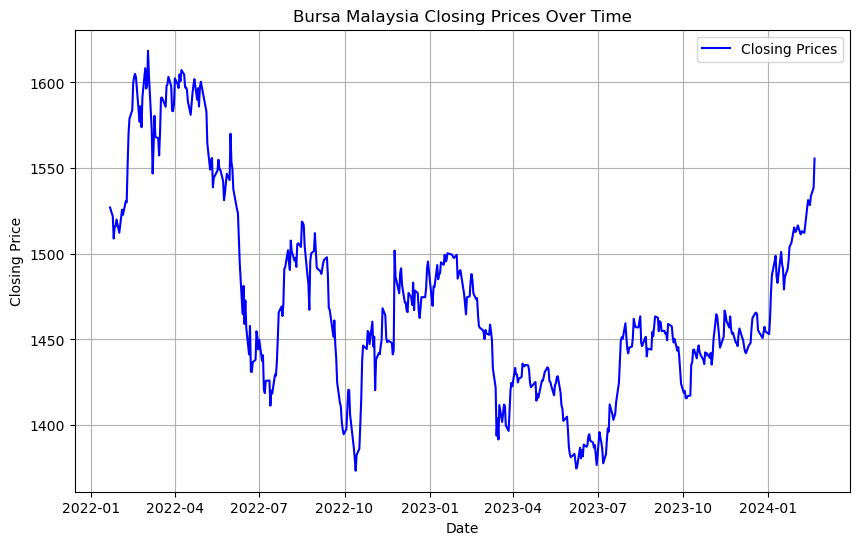

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('^KLSE.csv')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Plot closing prices over time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], color='blue', label='Closing Prices')
plt.title('Bursa Malaysia Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()


# Plot Moving Average

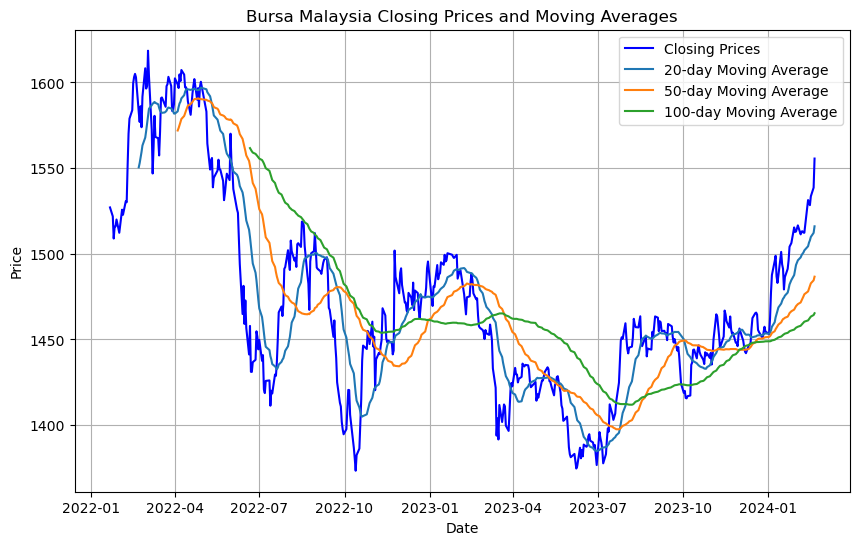

In [3]:
# Calculate and plot moving averages
window_sizes = [20, 50, 100]  # Define window sizes for moving averages

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], color='blue', label='Closing Prices')

for window_size in window_sizes:
    rolling_mean = df['Close'].rolling(window=window_size).mean()
    plt.plot(df['Date'], rolling_mean, label=f'{window_size}-day Moving Average')
    
plt.title('Bursa Malaysia Closing Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


# Plot Volume Over Time

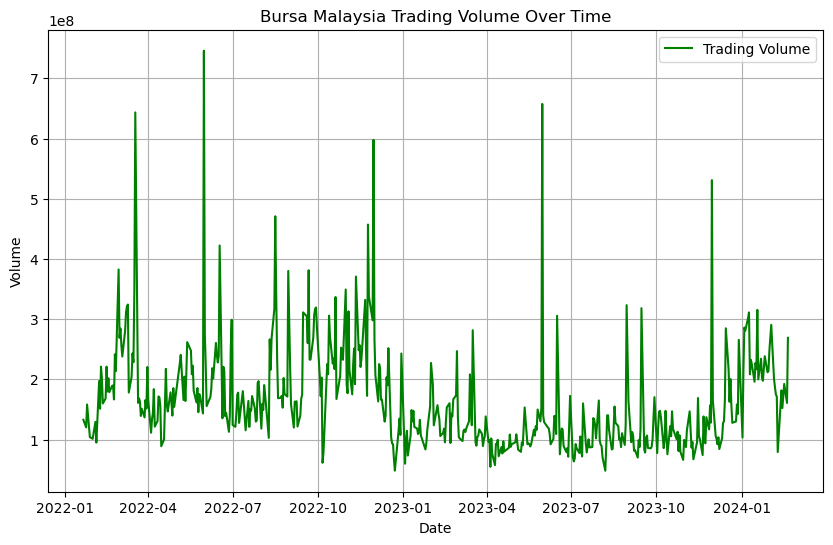

In [4]:
# Analyze distribution of trading volumes
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Volume'], color='green', label='Trading Volume')
plt.title('Bursa Malaysia Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

# Plot histogram for closing prices

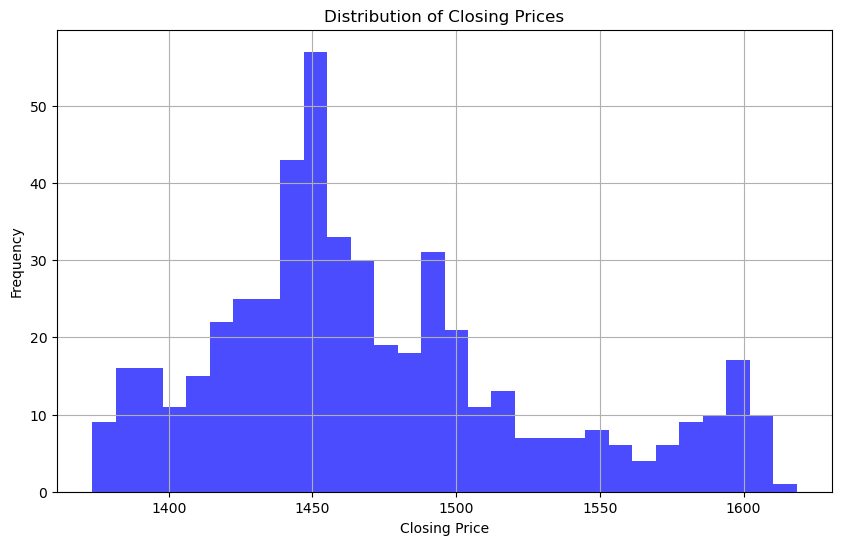

In [5]:
plt.figure(figsize=(10, 6))
plt.hist(df['Close'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot histogram for trading volumes

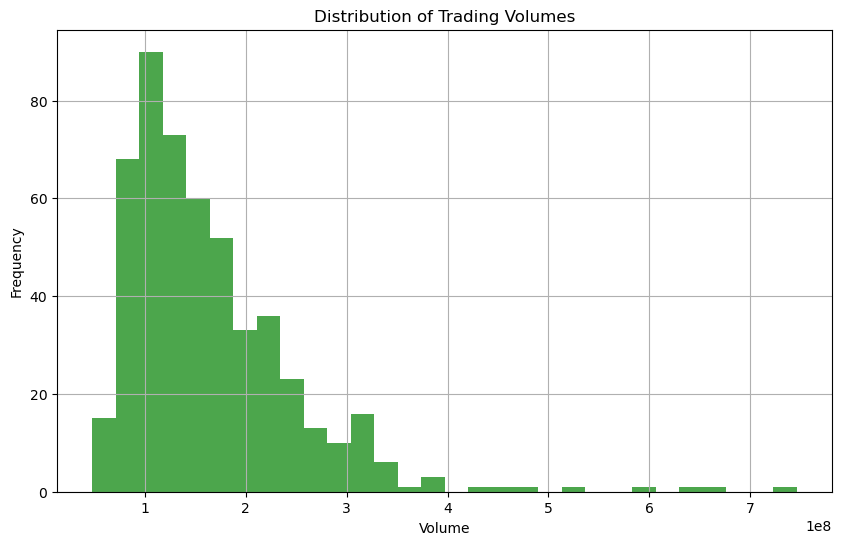

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(df['Volume'], bins=30, color='green', alpha=0.7)
plt.title('Distribution of Trading Volumes')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Create heatmap for returns

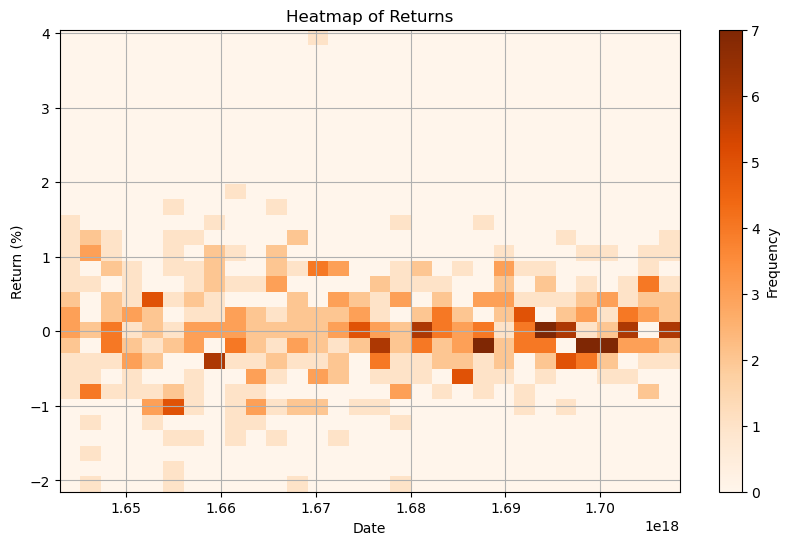

In [7]:
# Calculate returns
df['Return'] = df['Close'].pct_change() * 100  # Percentage returns

# Drop NaN values
df.dropna(subset=['Return'], inplace=True)

plt.figure(figsize=(10, 6))
plt.hist2d(df['Date'], df['Return'], bins=30, cmap='Oranges')
plt.colorbar(label='Frequency')
plt.title('Heatmap of Returns')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.grid(True)
plt.show()


# Plot RSI

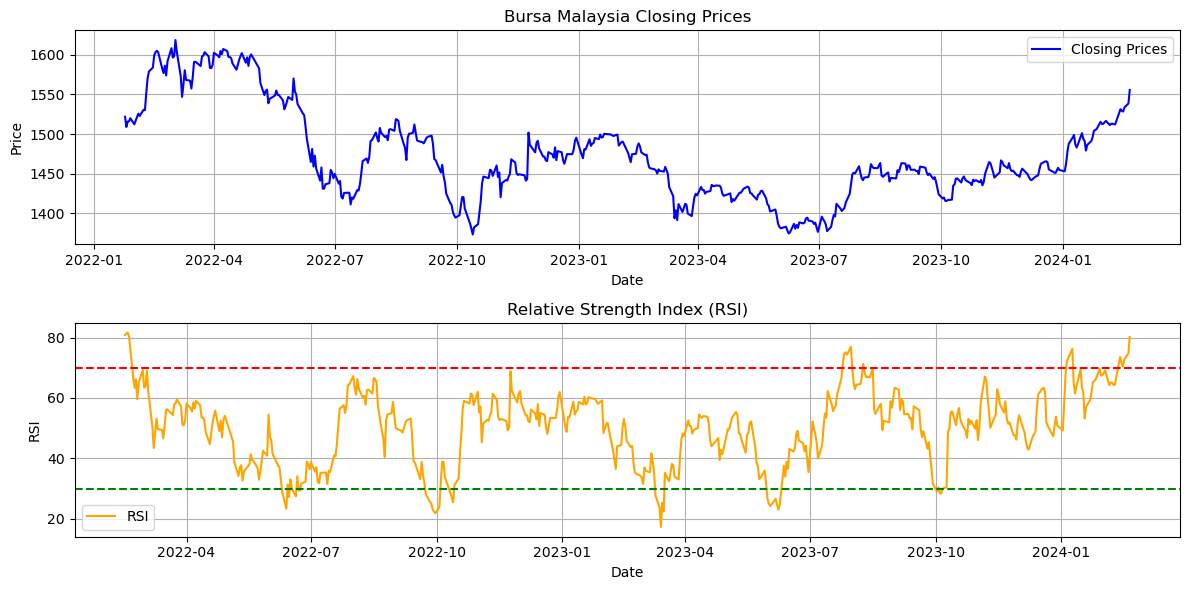

In [8]:
import numpy as np
import talib

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Ensure data is sorted by date
df.sort_values('Date', inplace=True)
df.reset_index(drop=True, inplace=True)

# Calculate RSI using TA-Lib
rsi_period = 14  # RSI period
df['RSI'] = talib.RSI(df['Close'], timeperiod=rsi_period)

# Plotting
plt.figure(figsize=(12, 6))

# Plot closing prices
plt.subplot(2, 1, 1)
plt.plot(df['Date'], df['Close'], label='Closing Prices', color='blue')
plt.title('Bursa Malaysia Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)


plt.subplot(2, 1, 2)
plt.plot(df['Date'], df['RSI'], label='RSI', color='orange')
plt.axhline(70, linestyle='--', color='red')  # Overbought threshold
plt.axhline(30, linestyle='--', color='green')  # Oversold threshold
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()